Building a DataFRame using *zip()*:

~~~
# Zip the 2 lists together into one list of (key,value) tuples: zipped
zipped = list(zip(list_keys,list_values))

# Inspect the list using print()
print(zipped)

# Build a dictionary with the zipped list: data
data = dict(zipped)

# Build and inspect a DataFrame from the dictionary: df
df = pd.DataFrame(data)
print(df)
~~~

### Importing & exporting data

**Problems**:

- CSV file has no column headers
	- Columns 0-2: Gregorian data (Y, M, D)
	- Column 3: Date as fraction of the year
	- Column 4: Daily total sunspot number
	- Column 5: Defintive/provisional indicator (1 or 0)
- Missing values in column 4: indicated by -1
- Dates representation is inconvenient

~~~
col_names = [...]

sunspots = pd.read_csv(filepath,
			header=None,
			names=col_names,
			na_values={'sunspots':[' -1']},
			parse_dates=[[0,1,2]])

sunspots.index = sunspots['year_month_day']
sunspots.index.name = 'date'

cols = ['sunspots','definite']
sunspots = sunspots[cols]

out_csv = 'sunspots.csv'
sunspots.to_csv(out_csv)

out_tsv = 'sunspots.tsv'
sunspots.to_csv(out_tsv,sep='\t')

out_xlsx = 'sunspots.xlsx'
sunspots.to_excel(out_xlsx)
~~~

#### Word of warning!

- Three different DataFrame plot idioms
	- *iris.plot(kind='hist')*
	- *iris.plt.hist()*
	- *iris.hist()*
- Syntax/results differ!

#### Statistical EDA

~~~
describe_all = iris.describe()

describe_setosa = setosa.describe()
describe_versicolor = versicolor.describe()
describe_virginia = virginica.describe()

# Computing errors

error_setosa = 100 * np.abs(describe_setosa - describe_all)/ describe_setosa
...

~~~

#### Using pandas to read datetime objects

- *read_csv()* function
	- Can read strings into datetime objects
	- Need to specify 'parse_dates=True'
- ISO 8601 format
	- yyyy-mm-dd hh:mm:ss

#### Selecting datetime

- Selecting whole day:

~~~
sales.loc['2015-2-5']
~~~

- Partial datetime string selection
	- sales.loc['February 5, 2015']
	- sales.loc['2015-Feb-5']
- Whole month: sales.loc['2015-2']
- Whole year: sales.loc['2015']
- Slicing:

~~~
sales.loc['2015-2-16':'2015-2-20']
~~~

**Converting strings to datetime**

~~~
evening_2_11 = pd.to_datetime(['2015-2-11 20:00',
				'2015-2-11 21:00',
				'2015-2-11 22:00',
				'2015-2-11 23:00'])
~~~

#### Reindexing DataFrame

~~~
sales.reindex(evening_2_11)
~~~

**Filling missing values**:

~~~
sales.reindex(evening_2_11, method='ffill')

sales.reindex(evening_2_11, method='bfill')
~~~

#### Resampling

- Statistical methods over different time intervals
	- mean(), sum(), count(), etc.
- Downsampling
	- reduce datetime rows to slower frequency
- Upsampling
	- increase datetime rows to faster frequency
	- ex: daily to hourly

~~~
daily_mean = sales.resample('D').mean()
~~~

1) The method resample() needs a string to specify frequency ('D' = daily);
2) It is best practice to follow resample() with some statistical method;
3) The result is a DataFrame with daily frequency for Feb, 2015 with the avg. number of units sold each day.

**Upsampling and filling**

~~~
two_days = sales.loc['2015-2-4':'2015-2-5','Units']

two_days.resample('4H').ffill()
~~~


~~~
# Extract data from 2010-Aug-01 to 2010-Aug-15: unsmoothed
unsmoothed = df['Temperature']['2010-8-1':'2010-8-15']

# Apply a rolling mean with a 24 hour window: smoothed
smoothed = unsmoothed.rolling(window=24).mean()

# Create a new DataFrame with columns smoothed and unsmoothed: august
august = pd.DataFrame({'smoothed':smoothed, 'unsmoothed':unsmoothed})

# Plot both smoothed and unsmoothed data using august.plot().
august.plot()
plt.show()
~~~

#### str attribute

~~~
sales['Company'].str.upper()

sales['Product'].str.contains('ware')
~~~

**Boolean reduction**

~~~
sales['Product'].str.contains('ware').sum()
~~~

#### dt attribute

~~~
sales['Date'].dt.hour
~~~

**Set timezone**

~~~
central = sales['Date'].dt.tz_localize('US/Central')


central.dt.tz_convert('US/Eastern')
~~~

#### Interpolate missing data

~~~
population.resample('A').first().interpolate('linear')
~~~

### Visualizing pandas time series

#### Plot styles

~~~
sp500.loc['2012-4','Close'].plot(style='k.-',
				title='S&P500')

plt.ylabel('Closing Price (US Dollars)')

plt.show()
~~~

- Style format string
	- color (k : black)
	- marker (. : dot)
	- line type (- : solid)

#### Subplots

~~~
sp500.loc['2012',['Close','Volume']].plot(subplots=True)

plt.show()
~~~

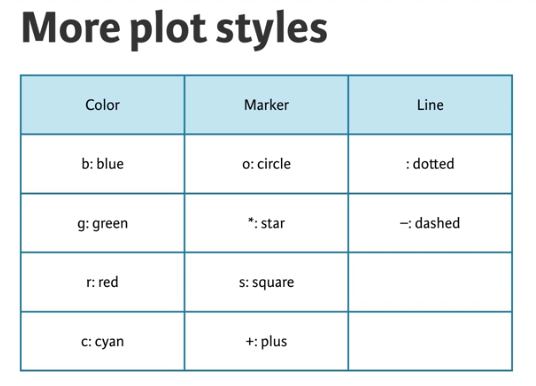

In [1]:
from IPython.display import Image
Image('./IMAGES/plot-styles.PNG')